In [1]:
from newsSentimentScoring import newsLineToScore,dateScore
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
import datetime
import matplotlib.pyplot as plt

2024-05-30 11:03:48.224386: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-30 11:03:48.266921: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-30 11:03:48.267556: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-30 11:03:48.959453: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[nltk_data] Downloading package punkt to /home/adam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/adam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/adam/nl

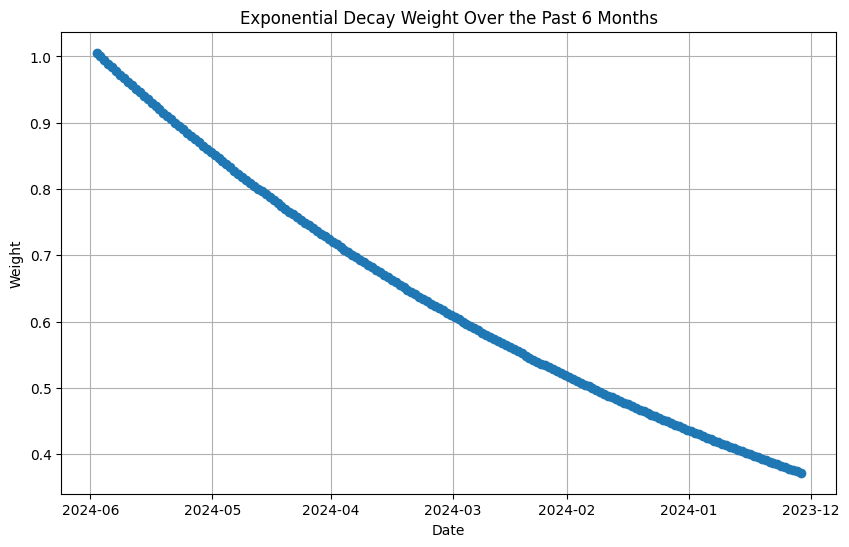

In [4]:
today = datetime.datetime.today()
dates = [today - datetime.timedelta(days=i) for i in range(180)]

# Calculate weights for these dates
weights = [dateScore(date) for date in dates]

# Plot the weights
plt.figure(figsize=(10, 6))
plt.plot(dates, weights, marker='o')
plt.xlabel('Date')
plt.ylabel('Weight')
plt.title('Exponential Decay Weight Over the Past 6 Months')
plt.grid(True)
plt.gca().invert_xaxis()  # Optional: invert x-axis to have most recent dates on the left
plt.show()

In [14]:
test_headlines = [
    # Positive Sentiment Examples
    "Company X reports record-breaking quarterly earnings, exceeding analyst expectations.",
    "Tech giant Y announces a major partnership with Z, driving stock prices up by 15%.",
    "Startup A secures $50 million in funding to expand its innovative product line.",
    "Retailer B sees a surge in sales during the holiday season, forecasting strong growth.",
    "Bank C receives regulatory approval for its new digital banking platform, boosting investor confidence.",
    "Fisker (NYSE:FSR) Jumps onto Supercharger Network via Agreement with TSLA'"
    
    # Negative Sentiment Examples
    "Company D's stock plummets after reporting significant losses in the third quarter.",
    "Major layoffs announced at Corporation E as it struggles to cope with declining revenues.",
    "Retailer F faces backlash over supply chain issues, resulting in a 10% drop in sales.",
    "Energy firm G fined $20 million for environmental violations, causing shares to fall.",
    "Tech startup H files for bankruptcy after failing to secure additional funding.",
    
    # Neutral Sentiment Examples
    "Company X appoints a new member to its board of directors.",
    "Tech giant Y to host its annual developer conference next month.",
    "Startup A releases a minor update to its flagship app.",
    "Retailer B opens a new store in downtown area.",
    "Bank C participates in the global financial summit this year."
]


In [15]:
cnn_sentiments = newsLineToScore(test_headlines,"CNN")

100%|██████████| 15/15 [00:00<00:00, 2129.52it/s]


['company x reports recordbreaking quarterly earnings exceeding analyst expectations', 'tech giant announces major partnership z driving stock prices 15', 'startup secures 50 million funding expand innovative product line', 'retailer b sees surge sales holiday season forecasting strong growth', 'bank c receives regulatory approval new digital banking platform boosting investor confidence', 'fisker nysefsr jumps onto supercharger network via agreement tslacompany ds stock plummets reporting significant losses third quarter', 'major layoffs announced corporation e struggles cope declining revenues', 'retailer f faces backlash supply chain issues resulting 10 drop sales', 'energy firm g fined 20 million environmental violations causing shares fall', 'tech startup h files bankruptcy failing secure additional funding', 'company x appoints new member board directors', 'tech giant host annual developer conference next month', 'startup releases minor update flagship app', 'retailer b opens new

In [16]:
lstm_sentiments = newsLineToScore(test_headlines,"LSTM")

100%|██████████| 15/15 [00:00<00:00, 371.60it/s]

['company x reports recordbreaking quarterly earnings exceeding analyst expectations', 'tech giant announces major partnership z driving stock prices 15', 'startup secures 50 million funding expand innovative product line', 'retailer b sees surge sales holiday season forecasting strong growth', 'bank c receives regulatory approval new digital banking platform boosting investor confidence', 'fisker nysefsr jumps onto supercharger network via agreement tslacompany ds stock plummets reporting significant losses third quarter', 'major layoffs announced corporation e struggles cope declining revenues', 'retailer f faces backlash supply chain issues resulting 10 drop sales', 'energy firm g fined 20 million environmental violations causing shares fall', 'tech startup h files bankruptcy failing secure additional funding', 'company x appoints new member board directors', 'tech giant host annual developer conference next month', 'startup releases minor update flagship app', 'retailer b opens new

2024-05-30 10:23:55.433101: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-30 10:23:55.434673: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-30 10:23:55.435779: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 1s 541ms/step


In [17]:
lstm_word2vec_sentiments = newsLineToScore(test_headlines,"LSTM-word2vec")

100%|██████████| 15/15 [00:00<00:00, 491.48it/s]


['company x reports recordbreaking quarterly earnings exceeding analyst expectations', 'tech giant announces major partnership z driving stock prices 15', 'startup secures 50 million funding expand innovative product line', 'retailer b sees surge sales holiday season forecasting strong growth', 'bank c receives regulatory approval new digital banking platform boosting investor confidence', 'fisker nysefsr jumps onto supercharger network via agreement tslacompany ds stock plummets reporting significant losses third quarter', 'major layoffs announced corporation e struggles cope declining revenues', 'retailer f faces backlash supply chain issues resulting 10 drop sales', 'energy firm g fined 20 million environmental violations causing shares fall', 'tech startup h files bankruptcy failing secure additional funding', 'company x appoints new member board directors', 'tech giant host annual developer conference next month', 'startup releases minor update flagship app', 'retailer b opens new

2024-05-30 10:23:57.715122: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-30 10:23:57.716747: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-30 10:23:57.717764: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 498ms/step


In [18]:
results = pd.DataFrame({
    'News':test_headlines,
    'CNN':cnn_sentiments,
    'LSTM':lstm_sentiments,
    'LSTM-word2vec':lstm_word2vec_sentiments,
    "Real":["Positive", "Positive", "Positive", "Positive", "Positive", "Negative", "Negative", "Negative", "Negative", "Negative", "Neutral", "Neutral", "Neutral", "Neutral", "Neutral"]
})

In [19]:
pd.set_option(“max_colwidth”, None)
results


,News,CNN,LSTM,LSTM-word2vec,Real
0,Company X reports record-breaking quarterly ea...,0.170880,0.983360,0.989310,Positive
1,Tech giant Y announces a major partnership wit...,-0.005515,0.000476,0.062287,Positive
2,Startup A secures $50 million in funding to ex...,0.851487,0.989009,0.845846,Positive
3,Retailer B sees a surge in sales during the ho...,0.835032,0.989915,0.988074,Positive
4,Bank C receives regulatory approval for its ne...,0.957475,0.993809,0.955924,Positive
5,Fisker (NYSE:FSR) Jumps onto Supercharger Netw...,-0.744996,0.994799,-0.967504,Negative
6,Major layoffs announced at Corporation E as it...,-0.325384,0.011592,-0.978313,Negative
7,Retailer F faces backlash over supply chain is...,-0.947956,-0.018200,-0.978382,Negative
8,Energy firm G fined $20 million for environmen...,-0.992311,-0.995301,-0.974245,Negative
9,Tech startup H files for bankruptcy after fail...,-0.031124,0.000485,-0.977835,Negative


In [9]:
def score_to_sentiment(score):
    if score < -0.33:
        return "Negative"
    elif score > 0.33:
        return "Positive"
    else:
        return "Neutral"

In [12]:
results['CNN Sentiment'] = results['CNN'].apply(score_to_sentiment)
results['LSTM Sentiment'] = results['LSTM'].apply(score_to_sentiment)
results['LSTM-word2vec Sentiment'] = results['LSTM-word2vec'].apply(score_to_sentiment)

# Calculate and print the accuracy for each model
accuracy_cnn = accuracy_score(results['Real'], results['CNN Sentiment'])
accuracy_lstm = accuracy_score(results['Real'], results['LSTM Sentiment'])
accuracy_lstm_word2vec = accuracy_score(results['Real'], results['LSTM-word2vec Sentiment'])

print(f"Accuracy for CNN: {accuracy_cnn:.2f}")
print(f"Accuracy for LSTM: {accuracy_lstm:.2f}")
print(f"Accuracy for LSTM with Word2Vec: {accuracy_lstm_word2vec:.2f}")

# Print classification reports for each model
print("\nClassification Report for CNN:")
print((classification_report(results['Real'], results['CNN Sentiment'])))

print("\nClassification Report for LSTM:")
print(classification_report(results['Real'], results['LSTM Sentiment']))

print("\nClassification Report for LSTM with Word2Vec:")
print(classification_report(results['Real'], results['LSTM-word2vec Sentiment']))

Accuracy for CNN: 0.73
Accuracy for LSTM: 0.67
Accuracy for LSTM with Word2Vec: 0.87

Classification Report for CNN:
              precision    recall  f1-score   support

    Negative       1.00      0.60      0.75         5
     Neutral       0.56      1.00      0.71         5
    Positive       1.00      0.60      0.75         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.74        15
weighted avg       0.85      0.73      0.74        15


Classification Report for LSTM:
              precision    recall  f1-score   support

    Negative       1.00      0.40      0.57         5
     Neutral       0.50      0.80      0.62         5
    Positive       0.80      0.80      0.80         5

    accuracy                           0.67        15
   macro avg       0.77      0.67      0.66        15
weighted avg       0.77      0.67      0.66        15


Classification Report for LSTM with Word2Vec:
              precision    recall  f1-sco

In [15]:
newsLineToScore(["Tesla (TSLA) Down 16.6% Since Last Earnings Report"],model="LSTM-word2vec")

100%|██████████| 1/1 [00:00<00:00, 369.57it/s]


['tesla tsla 166 since last earnings report']
[[314, 5877, 3013, 213, 68, 24, 66]]


2024-05-29 19:05:29.283631: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-29 19:05:29.285196: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-29 19:05:29.286216: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 1s 579ms/step


[0.009668634505942464]

In [ ]:
overall_score = calculate_final_scores()
